In [1]:
import numpy as np
import cupy as cp
import ray
import astropy.units as u
from astropy.io import fits
from IPython.display import clear_output
import time
from pathlib import Path
from matplotlib.patches import Circle
from importlib import reload

import warnings
warnings.filterwarnings("ignore")

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import cgi_phasec_poppy
from cgi_phasec_poppy.imshows import *
from cgi_phasec_poppy.math_module import xp
reload(cgi_phasec_poppy)
data_dir = cgi_phasec_poppy.data_dir

In [2]:

wavelength_c = 545e-9*u.m

nwaves = 7
bandwidth = 10/100
minwave = wavelength_c * (1 - bandwidth/2)
maxwave = wavelength_c * (1 + bandwidth/2)
wavelengths = np.linspace( minwave, maxwave, nwaves )

6.032241318333288e-16 sr


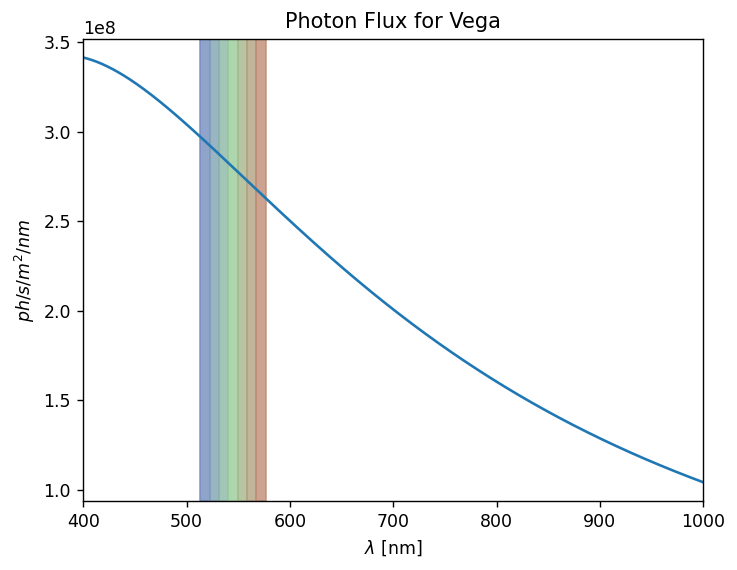

In [5]:
reload(cgi_phasec_poppy.source_flux)

minlam = 400*u.nm
maxlam = 1000*u.nm
nlam = int((maxlam-minlam).value*20) + 1
lambdas = np.linspace(minlam, maxlam, nlam)

from astropy.constants import h, c, k_B, R_sun

vega = cgi_phasec_poppy.source_flux.SOURCE(wavelengths=wavelengths,
                                            temp=9600*u.K,
                                            distance=7.68*u.parsec,
                                            diameter=2*2.36*R_sun,
                                            name='Vega', 
                                            lambdas=lambdas,
                                           )

vega.plot_spectrum_ph()
source_fluxes = vega.calc_fluxes()
total_flux = np.sum(source_fluxes)